## Recommendation systems :-
- Content Based :- we are going to do content based   
- Collaborative Filtering --> model based and memory based are its type


In [1]:
import numpy as np
import pandas as pd
import warnings 

In [2]:
warnings.filterwarnings('ignore')

### Getting and working on the data set

In [3]:
column_names=["user_id","item_id","rating","timestamp"]
df=pd.read_csv('ml-100k/u.data',sep='\t',names=column_names) 
#if we open the file we see that they are tab separated so we simply change the sep value to a tab

In [4]:
df.head()

,user_id,item_id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [5]:
df.shape

(100000, 4)

In [6]:
df['user_id'].nunique() 

943

In [7]:
df['item_id'].nunique()

1682

In [42]:
movies_titles= pd.read_csv('ml-100k/u.item',sep="\|",header=None)
movies_titles.head()

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [9]:
#since we only require movie name and movie id
movies_titles=movies_titles[[0,1]]

In [10]:
movies_titles.columns=['item_id','title']
movies_titles.head()

,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


In [11]:
df=pd.merge(df,movies_titles,on='item_id')

In [12]:
df.tail(n=10)

,user_id,item_id,rating,timestamp,title
99990,416,1594,5,893212484,Everest (1998)
99991,648,1626,1,884795447,Nobody Loves Me (Keiner liebt mich) (1994)
99992,655,1645,4,892871225,"Butcher Boy, The (1998)"
99993,747,1659,1,888733313,Getting Away With Murder (1996)
99994,916,1682,3,880845755,Scream of Stone (Schrei aus Stein) (1991)
99995,840,1674,4,891211682,Mamma Roma (1962)
99996,655,1640,3,888474646,"Eighth Day, The (1996)"
99997,655,1637,3,888984255,Girls Town (1996)
99998,655,1630,3,887428735,"Silence of the Palace, The (Saimt el Qusur) (1..."
99999,655,1641,3,887427810,Dadetown (1995)


## Exploratory data analysis

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')

In [14]:
df.groupby('title').mean()['rating'].sort_values(ascending=False).head() #arranging the movies according to its rating

title
They Made Me a Criminal (1939)                5.0
Marlene Dietrich: Shadow and Light (1996)     5.0
Saint of Fort Washington, The (1993)          5.0
Someone Else's America (1995)                 5.0
Star Kid (1997)                               5.0
Name: rating, dtype: float64

In [15]:
ratings=pd.DataFrame(df.groupby('title').mean()['rating']) #making a data frame according to its mean rating

In [16]:
ratings.head()

,rating
title,
'Til There Was You (1997),2.333333
1-900 (1994),2.600000
101 Dalmatians (1996),2.908257
12 Angry Men (1957),4.344000
187 (1997),3.024390


In [17]:
ratings['NumberofViewers']=pd.DataFrame(df.groupby('title').count()['rating']) #joining number of viewers column to ratings

In [18]:
ratings.head()

,rating,NumberofViewers
title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41


In [19]:
ratings.sort_values(by='rating',ascending=False) 

,rating,NumberofViewers
title,,
They Made Me a Criminal (1939),5.0,1
Marlene Dietrich: Shadow and Light (1996),5.0,1
"Saint of Fort Washington, The (1993)",5.0,2
Someone Else's America (1995),5.0,1
Star Kid (1997),5.0,3
...,...,...
"Eye of Vichy, The (Oeil de Vichy, L') (1993)",1.0,1
King of New York (1990),1.0,1
Touki Bouki (Journey of the Hyena) (1973),1.0,1


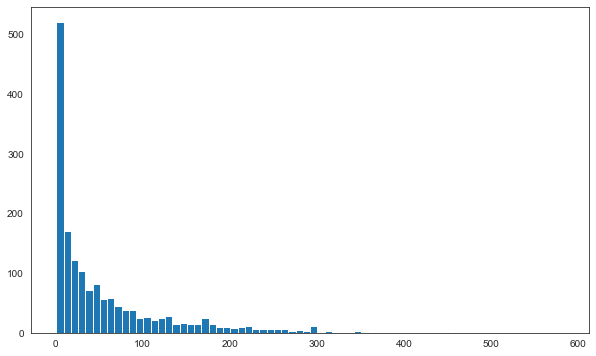

In [20]:
plt.figure(figsize=(10,6))
plt.hist(ratings['NumberofViewers'],bins=70)
plt.show()
#conclusion:- a lot of movies have only gotten rated by 0-50 people which is not useful for making an informed prediction hence we can discard it

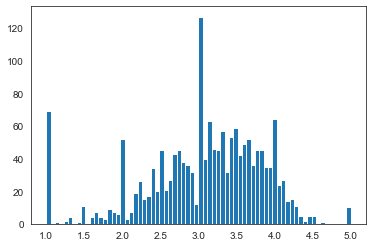

In [21]:
plt.hist(ratings['rating'],bins=70)
plt.show()

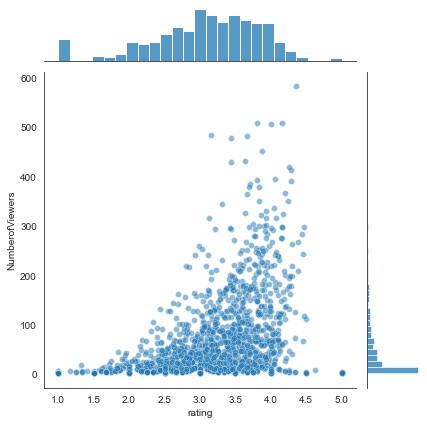

In [22]:
sns.jointplot(x='rating',y='NumberofViewers',data=ratings,alpha=0.5)

## Creating Movie Recommendation

#### 1. Creating Matrix which has index as rows, movie title as column, and cells contain the rating user has gives to a specific movie

In [23]:
df.head()

,user_id,item_id,rating,timestamp,title
0,196,242,3,881250949,Kolya (1996)
1,63,242,3,875747190,Kolya (1996)
2,226,242,5,883888671,Kolya (1996)
3,154,242,3,879138235,Kolya (1996)
4,306,242,5,876503793,Kolya (1996)


In [24]:
moviematrix=df.pivot_table(index="user_id",columns="title",values="rating")

In [25]:
moviematrix.head()

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,� k�ldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,2.0,NaN,NaN,NaN,NaN,4.0,NaN,NaN,...,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,4.0,NaN


In [26]:
ratings.sort_values("NumberofViewers",ascending=False).head()

,rating,NumberofViewers
title,,
Star Wars (1977),4.358491,583
Contact (1997),3.803536,509
Fargo (1996),4.155512,508
Return of the Jedi (1983),4.007890,507
Liar Liar (1997),3.156701,485


#### 2. Let's work on the prediction using one movie right now then we will generalize it later, for this example I am using Star Wars

In [27]:
starwars_user_ratings=moviematrix['Star Wars (1977)']

In [28]:
starwars_user_ratings.head()

user_id
1    5.0
2    5.0
3    NaN
4    5.0
5    4.0
Name: Star Wars (1977), dtype: float64

#### 3.we will correlate this user rating of star wars with the entire movie matrix and find the ones which is most correlated to tit and recommend that

In [29]:
similar_to_starwars=moviematrix.corrwith(starwars_user_ratings).sort_values(ascending=False)

In [30]:
corr_starwars=pd.DataFrame(similar_to_starwars,columns=["Correlation"])

In [31]:
corr_starwars.dropna(inplace=True)

In [32]:
corr_starwars.head()

,Correlation
title,
Hollow Reed (1996),1.0
Commandments (1997),1.0
Cosi (1996),1.0
No Escape (1994),1.0
Stripes (1981),1.0


In [33]:
corr_starwars.sort_values('Correlation',ascending=False).head(n=10)

,Correlation
title,
Hollow Reed (1996),1.0
Cosi (1996),1.0
No Escape (1994),1.0
Stripes (1981),1.0
Star Wars (1977),1.0
Man of the Year (1995),1.0
Commandments (1997),1.0
Safe Passage (1994),1.0
Mondo (1996),1.0


In [34]:
corr_starwars=corr_starwars.join(ratings['NumberofViewers'])

In [35]:
corr_starwars.head()

,Correlation,NumberofViewers
title,,
Hollow Reed (1996),1.0,6
Commandments (1997),1.0,3
Cosi (1996),1.0,4
No Escape (1994),1.0,5
Stripes (1981),1.0,5


In [36]:
corr_starwars[corr_starwars['NumberofViewers']>100].head(n=10)

,Correlation,NumberofViewers
title,,
Star Wars (1977),1.000000,583
"Empire Strikes Back, The (1980)",0.747981,367
Return of the Jedi (1983),0.672556,507
Raiders of the Lost Ark (1981),0.536117,420
Austin Powers: International Man of Mystery (1997),0.377433,130
"Sting, The (1973)",0.367538,241
Indiana Jones and the Last Crusade (1989),0.350107,331
Pinocchio (1940),0.347868,101
"Frighteners, The (1996)",0.332729,115


#### 4. Predict for all now

In [37]:
def predict_movies(movie_name):
    movie_user_ratings=moviematrix[movie_name]
    similar_to_movie=moviematrix.corrwith(movie_user_ratings)
    corr_movie=pd.DataFrame(similar_to_movie,columns=["Correlation"])
    corr_movie.dropna(inplace=True)
    corr_movie=corr_movie.join(ratings['NumberofViewers'])
    prediction=corr_movie[corr_movie['NumberofViewers']>100].sort_values('Correlation',ascending=False)

    return prediction
    

In [38]:
predictions=predict_movies("Indiana Jones and the Last Crusade (1989)")

In [39]:
predictions.head()

,Correlation,NumberofViewers
title,,
Indiana Jones and the Last Crusade (1989),1.000000,331
"Ghost and the Darkness, The (1996)",0.553154,128
Raiders of the Lost Ark (1981),0.539606,420
Young Guns (1988),0.492670,101
Back to the Future (1985),0.479793,350
